In [1]:
import numpy as np
from astropy.table import Table,hstack,vstack,join
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import glob
import sys
import matplotlib.pyplot as plt

from scipy import constants
speedoflight = constants.c / 1000.0

import socket
hostname = socket.gethostname()

In [2]:
datadir = '/n/holyscratch01/conroy_lab/vchandra/sdss5/'
pipedir = '/n/home03/vchandra/outerhalo/09_sdss5/pipeline/'

sys.path.append(pipedir)

In [3]:
from getdata import getdata

In [4]:
with open(pipedir + 'control/redux.txt', 'r') as file:
    redux = file.read().replace('\n','')

In [5]:
acat = Table.read(datadir + 'catalogs/mwmhalo_acat.fits')

### Preview LSF

In [6]:
data = getdata(acat_id = 0)

In [7]:
wl = data['spec'][0]

In [8]:
wresl = data['spec'][5]

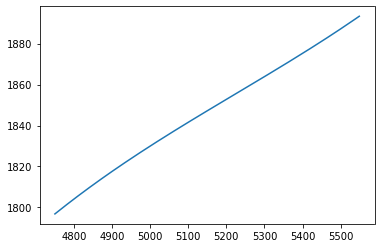

In [12]:
plt.plot(wl, wl/wresl/2.355)

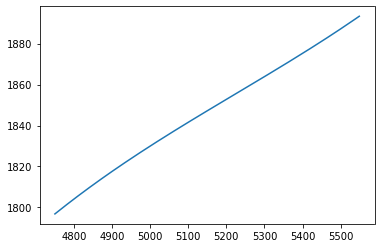

In [9]:
plt.plot(wl, (wl/wresl) / 2.355)

In [11]:
f = fits.open('/n/holyscratch01/conroy_lab/vchandra/sdss5/spectra/v6_0_9/openfibertargets_nov2020_28b/spec-100031-59715-27021598825497730.fits')

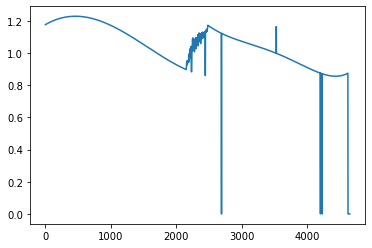

In [23]:
plt.plot(f[1].data['WDISP'])

In [17]:
f1 = fits.open('/n/holystore01/LABS/conroy_lab/Lab/SEGUE/data/SEGUE/1661/spPlate-1661-53240.fits')

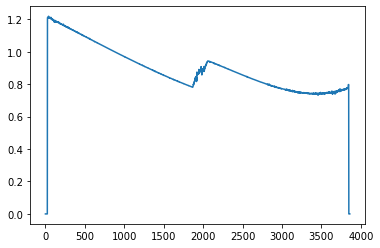

In [22]:
plt.plot(f1[4].data[0])

In [16]:
f1[1].data

FITS_rec([(4750.06989383, 80.69976 , 2.206873 , 1.14726012),
          (4751.16376378, 78.36948 , 2.1817753, 1.14736024),
          (4752.25788562, 78.82063 , 2.2011335, 1.14746034),
          (4753.35225943, 79.931305, 2.253965 , 1.14756019),
          (4754.44688525, 79.22384 , 2.24232  , 1.1476599 ),
          (4755.54176315, 79.92379 , 2.2269716, 1.14775911),
          (4756.63689319, 80.564156, 2.1953328, 1.1478588 ),
          (4757.73227541, 81.00945 , 2.2151015, 1.14795871),
          (4758.82790989, 82.22096 , 2.2425761, 1.14805848),
          (4759.92379667, 81.713455, 2.3019195, 1.14815848),
          (4761.01993583, 82.476425, 2.3321216, 1.1482581 ),
          (4762.1163274 , 81.527176, 2.2982357, 1.14835783),
          (4763.21297146, 80.89274 , 2.2356865, 1.14845803),
          (4764.30986806, 80.09041 , 2.19834  , 1.14855724),
          (4765.40701725, 77.77839 , 2.171148 , 1.14865693),
          (4766.50441911, 80.68952 , 2.237322 , 1.14875635),
          (4767.60207368

In [ ]:
f[0].header

### All Clean Halo Stars

In [7]:
len(acat)

10199

In [8]:
clean = (
    (acat['SN_MEDIAN_ALL'] > 10)
)

np.sum(clean)

7748

In [9]:
acat[clean].write(datadir + 'catalogs/mwmhalo_clean_acat.fits', overwrite = True)

### Low Parallax Halo Stars

In [41]:
oh = (
    ((acat['GAIAEDR3_PARALLAX'] < 0.2) | 
    (acat['carton'] == 'openfibertargets_nov2020_28a')) &
    (acat['SN_MEDIAN_ALL'] > 10)
)

print(len(oh))
print(np.sum(oh))

10199
2939


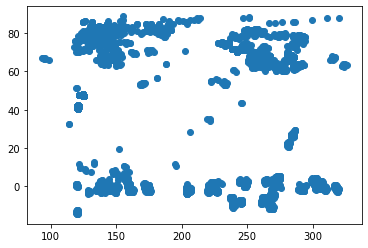

In [43]:
plt.scatter(acat[oh]['RA'], acat[oh]['DEC'])

In [45]:
acat[oh].write(datadir + 'catalogs/mwmhalo_oh_acat.fits', overwrite = True)

In [6]:
ntest = 10

In [7]:
testsel = (

    (acat['SN_MEDIAN_ALL'] > 30) &
    (acat['GAIAEDR3_PARALLAX'] < 0.1) &
    (acat['FIELDQUALITY'] == 'good')

)

np.sum(testsel)

24

In [8]:
idx = np.random.choice(np.arange(np.sum(testsel)), size = ntest, replace = False)
test = acat[testsel][idx]

(3900.0, 5200.0)

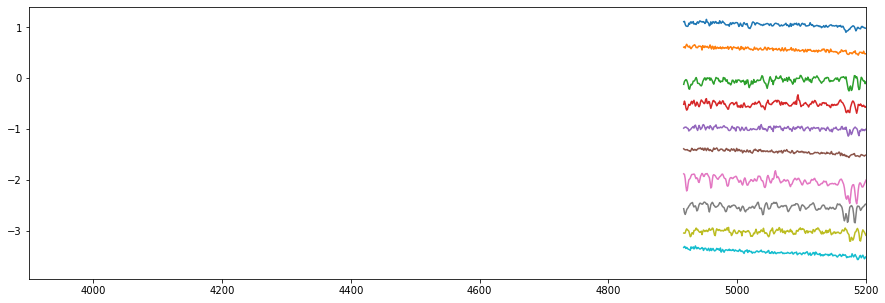

In [9]:
plt.figure(figsize = (15, 5))


for ii in range(len(test)):
    dat = getdata(acat_id = test['ACAT_ID'][ii])
    wl = dat['spec'][0][150:-50]
    fl = dat['spec'][1][150:-50]

    plt.plot(wl, fl / fl.mean() - 0.5 * ii)

    
plt.xlim(3900, 5200)

In [10]:
len(test)

10

### H3 Xmatch

In [11]:
rcat = Table.read('/n/holystore01/LABS/conroy_lab/Lab/h3/catalogs/rcat_V4.0.5.d20220422_MSG.h5')

In [12]:
import astropy

In [13]:
acat = acat.filled(99.0)

In [14]:
for key in list(rcat.columns):
    rcat.rename_column(key, 'h3_' + key)

In [15]:
rcat['GAIAEDR3_ID'] = rcat['h3_GAIAEDR3_ID']

In [16]:
xh3 = astropy.table.join(acat, rcat, keys = 'GAIAEDR3_ID')

In [17]:
len(xh3)

96

In [18]:
xh3.write(datadir + 'catalogs/mwmhalo_xh3_acat.fits', overwrite = True)

### SEGUE Xmatch

In [21]:
segr = Table.read('/n/holystore01/LABS/conroy_lab/Lab/SEGUE/catalogs/SEGUE_rcat_V1.0_MSG.fits')

In [24]:
for key in list(segr.columns):
    segr.rename_column(key, 'seg_' + key)

In [26]:
segr['GAIAEDR3_ID'] = segr['seg_GAIAEDR3_ID']

In [27]:
xseg = astropy.table.join(acat, segr, keys = 'GAIAEDR3_ID')

In [33]:
segcl = (

    (xseg['seg_FLAG'] == 0) & 
    (xseg['seg_SNR'] > 10)

)

np.sum(segcl)

151

In [36]:
xseg[segcl].write(datadir + 'catalogs/mwmhalo_xseg_acat.fits', overwrite = True)

In [99]:
samplefile = '/n/holyscratch01/conroy_lab/vchandra/sdss5/samples/mwmhalo_test/mwm_gaiaID_931182930209980032_fieldID_19092_mjd_59647_catID_27021597919926397_V0.0_samp.dat'

In [100]:
import os

In [102]:
os.path.isfile(samplefile)

False

In [103]:
acat

PROGRAMNAME,FIELDQUALITY,GAIA_G,FIRSTCARTON,RACAT,DECCAT,CATALOGID,FIELD,NEXP,EXPTIME,AIRMASS,HEALPIX,MJD_FINAL,SPEC_FILE,MJD,FIBER_RA,FIBER_DEC,SN_MEDIAN_ALL,SPECOBJID,MOON_DIST,MOON_PHASE,CARTON_TO_TARGET_PK,carton,H3_ID,PS_ID,TMASS_ID,WISE_ID,UNWISE_ID,GAIAEDR3_ID,GAIADR1_ID,TILE_ID,RA,DEC,RA_S,DEC_S,L,B,EBV,BHB,MGIANT,RAND,GUIDE,XFIT_RANK,PS_G,PS_R,PS_I,PS_Z,PS_Y,SDSS_U,SDSS_G,SDSS_R,SDSS_I,SDSS_Z,TMASS_J,TMASS_H,TMASS_K,WISE_W1,WISE_W2,UNWISE_W1,UNWISE_W2,GAIAEDR3_G,GAIAEDR3_BP,GAIAEDR3_RP,PS_G_ERR,PS_R_ERR,PS_I_ERR,PS_Z_ERR,PS_Y_ERR,SDSS_U_ERR,SDSS_G_ERR,SDSS_R_ERR,SDSS_I_ERR,SDSS_Z_ERR,TMASS_J_ERR,TMASS_H_ERR,TMASS_K_ERR,WISE_W1_ERR,WISE_W2_ERR,UNWISE_W1_ERR,UNWISE_W2_ERR,GAIAEDR3_G_ERR,GAIAEDR3_BP_ERR,GAIAEDR3_RP_ERR,GAIAEDR3_RA,GAIAEDR3_DEC,GAIAEDR3_RA_ERROR,GAIAEDR3_DEC_ERROR,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PARALLAX_OVER_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMDEC,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PSEUDOCOLOUR,GAIAEDR3_PSEUDOCOLOUR_ERROR,GAIAEDR3_NU_EFF_USED_IN_ASTROMETRY,GAIAEDR3_ASTROMETRIC_PARAMS_SOLVED,GAIAEDR3_PHOT_BP_RP_EXCESS_FACTOR,GAIAEDR3_VISIBILITY_PERIODS_USED,GAIAEDR3_RUWE,GAIAEDR3_IPD_GOF_HARMONIC_AMPLITUDE,GAIAEDR3_G_CORRECTED,GAIAEDR3_PARALLAX_CORRECTED,GAIAEDR3_PHOT_BP_RP_EXCESS_FACTOR_CORRECTED,GAIAEDR3_PARALLAX_PMRA_CORR,GAIAEDR3_PARALLAX_PMDEC_CORR,GAIAEDR3_PMRA_PMDEC_CORR,GAIAEDR3_RA_DEC_CORR,GAIAEDR3_RA_PARALLAX_CORR,GAIAEDR3_RA_PMRA_CORR,GAIAEDR3_RA_PMDEC_CORR,GAIAEDR3_DEC_PARALLAX_CORR,GAIAEDR3_DEC_PMRA_CORR,GAIAEDR3_DEC_PMDEC_CORR,WISE_CC_FLAGS,WISE_EXT_FLAG,UNWISE_FRACFLUX [2],UNWISE_FLAGS [2],UNWISE_INFO_FLAGS [2],ACAT_ID
bytes13,bytes4,float32,bytes48,float64,float64,int64,int32,int16,int16,float32,int32,float64,bytes42,int32,float64,float64,float32,int64,float32,float32,int64,bytes48,int32,int32,bytes17,bytes19,bytes16,int64,int32,bytes8,float64,float64,bytes11,bytes12,float64,float64,float64,int16,int16,float64,int16,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes4,int32,float32,int16,int16,int64
open_fiber,bad,16.778517,openfibertargets_nov2020_28c,289.656192484576,1.353059145374488,27021598780193757,100526,2,1800,1.2022252,95900,59740.420928012354,spec-100526-59740-27021598780193757.fits,59740,289.65618,1.3530392,26.637514,2501755803738596352,86.850006,0.78,582115952,openfibertargets_nov2020_28c,0,343118,-5995487372680608,0,2889p015o0020844,4264773302291367424,0,--,289.6561920290985,1.353058108203782,--,--,37.25049337510588,-5.424318965997192,0.5834862589836121,0,0,0.0,0,0.0,17.606733,16.667469,16.445084,16.130613,16.207764,99.0,99.0,99.0,99.0,99.0,15.313,14.879,14.894,0.0,0.0,14.719589,14.937925,16.782972,17.288391,16.08068,0.0067336713,0.007840145,0.0041791494,0.005884678,0.006424861,99.0,99.0,99.0,99.0,99.0,0.057,0.064,0.124,0.0,0.0,0.00968621,0.033673324,0.00840809,0.033256654,0.021841282,289.6561920290985,1.353058108203782,0.052065536,0.05129953,0.10847784842410181,0.06600257,1.6435398,-3.3166855612983634,-7.4719554142724665,0.06565359,0.06321045,--,--,1.4733317,31,1.2590151,17.0,0.98641694,0.30770612,16.782938,0.1372368484241018,0.021675539185523673,-0.1650221,-0.009425651,0.23975869,0.25458586,-0.004593028,0.013982099,-0.04328218,-0.27277145,0.004729799,0.06319329,0,0,0.6263639 .. 0.5851629,0 .. 0,0 .. 0,0
open_fiber,bad,17.403376,openfibertargets_nov2020_25,288.5624159315069,-1.9213952106871195,27021598708526805,100555,1,900,--,101530,59731.41554450247,spec-100555-59731-27021598708526805.fits,59731,288.56237,-1.9214876,14.

In [94]:
from astropy.io import ascii

In [97]:
ascii.read('/n/holyscratch01/conroy_lab/vchandra/sdss5/samples/mwmhalo_test/mwm_gaiaID_931182930209980032_fieldID_19092_mjd_59602_catID_27021597919926397_V0.0_samp.dat', data_start = 1000)

InconsistentTableError: 
ERROR: Unable to guess table format with the guesses listed below:
Reader:Ecsv data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FixedWidthTwoLine data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:RST data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastBasic data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Basic data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastRdb data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Rdb data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastTab data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Tab data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Cds data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Daophot data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:SExtractor data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Ipac data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Latex data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:AASTex data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastCommentedHeader data_start: 1000 delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader data_start: 1000 delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader data_start: 1000 delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader data_start: 1000 delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader data_start: 1000 delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader data_start: 1000 delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader data_start: 1000 delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader data_start: 1000 delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader data_start: 1000 delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader data_start: 1000 delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader data_start: 1000 delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader data_start: 1000 delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader data_start: 1000 delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader data_start: 1000 delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader data_start: 1000 delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader data_start: 1000 delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic data_start: 1000 delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic data_start: 1000 delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic data_start: 1000 delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic data_start: 1000 delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic data_start: 1000 delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic data_start: 1000 delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic data_start: 1000 delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic data_start: 1000 delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic data_start: 1000 delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic data_start: 1000 delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic data_start: 1000 delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic data_start: 1000 delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic data_start: 1000 delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic data_start: 1000 delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic data_start: 1000 delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic data_start: 1000 delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader data_start: 1000 delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader data_start: 1000 delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader data_start: 1000 delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader data_start: 1000 delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader data_start: 1000 delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader data_start: 1000 delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader data_start: 1000 delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader data_start: 1000 delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader data_start: 1000 delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader data_start: 1000 delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader data_start: 1000 delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader data_start: 1000 delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader data_start: 1000 delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader data_start: 1000 delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader data_start: 1000 delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader data_start: 1000 delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic data_start: 1000 fast_reader: {'enable': True} fill_values: [('', '0')]

************************************************************************
** ERROR: Unable to guess table format with the guesses listed above. **
**                                                                    **
** To figure out why the table did not read, use guess=False and      **
** fast_reader=False, along with any appropriate arguments to read(). **
** In particular specify the format and any known attributes like the **
** delimiter.                                                         **
************************************************************************

In [92]:
tab = Table.read('/n/holyscratch01/conroy_lab/vchandra/sdss5/samples/mwmhalo_test/mwm_gaiaID_931182930209980032_fieldID_19092_mjd_59602_catID_27021597919926397_V0.0_samp.dat', 
                format = 'ascii')

InconsistentTableError: 
ERROR: Unable to guess table format with the guesses listed below:
Reader:Ecsv fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FixedWidthTwoLine fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:RST fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastBasic fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Basic fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastRdb fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Rdb fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastTab fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Tab fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Cds fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Daophot fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:SExtractor fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Ipac fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Latex fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:AASTex fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastCommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: '|' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: ',' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: ' ' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: '\\s' fast_reader: {'enable': True} fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic fast_reader: {'enable': True} fill_values: [('', '0')]

************************************************************************
** ERROR: Unable to guess table format with the guesses listed above. **
**                                                                    **
** To figure out why the table did not read, use guess=False and      **
** fast_reader=False, along with any appropriate arguments to read(). **
** In particular specify the format and any known attributes like the **
** delimiter.                                                         **
************************************************************************

In [90]:
tab

Iter,Vrad,Vrot,Dist,Av,EEP,initial_[Fe/H],initial_[a/Fe],initial_Mass,pc_0,pc_1,pc_2,pc_3,Inst_R,Teff,log(g),log(R),[Fe/H],[a/Fe],log(Age),Mass,log(L),Agewgt,log(lk),log(vol),log(wt),h,nc,log(z),delta(log(z))
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64
0,15.419771971085083,199.44535347140098,5182.079639946304,0.01787664287454291,510.1735218153166,-0.17398412781702,0.582740772404432,1.0224154785508544,0.6793593494710146,0.5883988054874081,0.24044233868944592,0.09705383364646751,nan,4266.094444502474,2.5514743997177516,0.9477604658045821,-0.1722576257175957,0.5887548231244601,10.078083852928188,1.0208768678187337,1.3691251219219591,3.248461324195616e-05,-1e+300,-0.001998002662673058,-1e+300,-1.996007984031923e+297,1,-1e+300,1e+300
1,353.3422258395934,49.27707505936189,5615.95814344699,0.034982822330006436,492.8276536231206,-2.8045855568145956,0.07881605645103484,0.8935834484549956,0.9173453041206059,-0.47991331128785064,0.7775547051908662,0.20991020305233188,nan,5464.893084120682,3.037712440037401,0.6755817677005238,-2.8267766265136576,0.08640184261320587,9.90224803185134,0.8924120428153633,1.254972541596138,3.739554338899611e-05,-1e+300,-0.003996005325346116,-1e+300,-3.988031920191636e+297,4,-1e+300,1e+300
2,-279.6058293394332,12.739900268036587,8612.340404516595,0.037474031653459014,752.3633367825103,-3.4939469438631376,0.4903164950700661,1.739120289505083,1.775480291140993,0.775823831984191,-0.20473539136605354,0.14898368549148125,nan,5184.352372817218,1.936521359677319,1.3696184599392052,-3.479435812915504,0.4967844390315737,9.053518763538097,1.7293683507102906,2.551497295868706,5.655973443229899e-06,-1e+300,-0.005994007988019174,-1e+300,-5.976079760670392e+297,5,-1e+300,1e+300
3,168.65906011761217,75.98049889830675,2795.4287280080907,0.023430733636979534,451.6037892607628,-3.216041929834299,0.26198000200852506,1.3888182002886202,1.6183724363435026,-0.4307331135100116,0.2853216610195724,-0.13466340667816468,nan,10796.365554874641,4.160290215239158,0.20997338840468407,-3.231676769094511,0.26853263321169407,9.263199286370355,1.3880247206025944,1.5065394276632795,0.00010759088684850303,-1e+300,-0.007992010650692232,-1e+300,-7.960159441786875e+297,26,-1e+300,1e+300
4,437.376301062416,113.93546543908616,36475.074095552394,0.034298597490552016,365.1184116180803,-2.8535370862649976,-0.16387426991768772,0.96044882125641,1.7276468978918857,-0.3153734299889179,0.1313940623104016,0.1334707476933381,nan,7436.916115368779,4.4503821385305224,-0.015111760421023291,-3.1435067669911816,-0.09922704414868222,9.532132648458333,0.9602064976190553,0.4088303378296846,0.0006520685148921271,-1e+300,-0.00999001331336529,-1e+300,-9.940278884018877e+297,3,-1e+300,1e+300
5,426.84625333215104,67.73233289113696,9162.294825217434,0.02838770907865898,387.2398530541047,-3.5969903120052145,0.4964787766549838,1.5091247328808404,0.800442832890583,-0.4757427268867557,0.3994829681403061,-0.18558388518747543,nan,11627.08985355575,4.528687687703299,0.043885312823670294,-3.6068854442134373,0.503088545370947,9.010425435658105,1.5087040540527337,1.3031370674787452,0.0005120091601974401,-1e+300,-0.011988015976038347,-1e+300,-1.191644599203482e+298,2,-1e+300,1e+300
6,395.2268467175044,13.107048440365876,18602.87334038078,0.030668055821601335,450.0950027290528,-0.21057226693457398,-0.06076587270634484,1.440361810937596,1.2273047153538337,0.5929266154048527,-0.6813434110693987,-0.3284557426628434,nan,6733.538133068314,3.780801172367708,0.4076392524214288,-0.22986884867949617,-0.05412255997215839,9.357034408880043,1.4395661021944337,1.081734127702187,0.0001058055813238565,-1e+300,-0.013986018638711404,-1e+300,-1.388866865472543e+298,2,-1e+300,1e+300
7,-455.8296608648811,17.79279514246868,4326.694400998866,0.03495872210569099,464.95826899888556,0.39838355522600466,-0.03733693450825806,

In [188]:
import matplotlib.pyplot as plt

In [219]:
data = getdata(0)

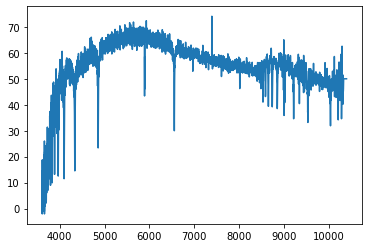

In [220]:
plt.plot(data['spec'][0][50:], data['spec'][1][50:])

In [223]:
from astropy.io import ascii

In [237]:
tab = ascii.read('/n/holyscratch01/conroy_lab/vchandra/sdss5/samples/segue_gaiaID_4264773302291367424_fieldID_100526_mjd_59740_catID_27021598780193757_VX_samp.dat')

In [238]:
tab['Pr'] = np.exp(tab['log(wt)']-tab['log(z)'][-1])
tab = tab[tab['Pr'] > 1e-10]

In [239]:
import corner

In [240]:
selcol = ['Teff', 'log(g)', '[Fe/H]', '[a/Fe]', 'log(Age)']

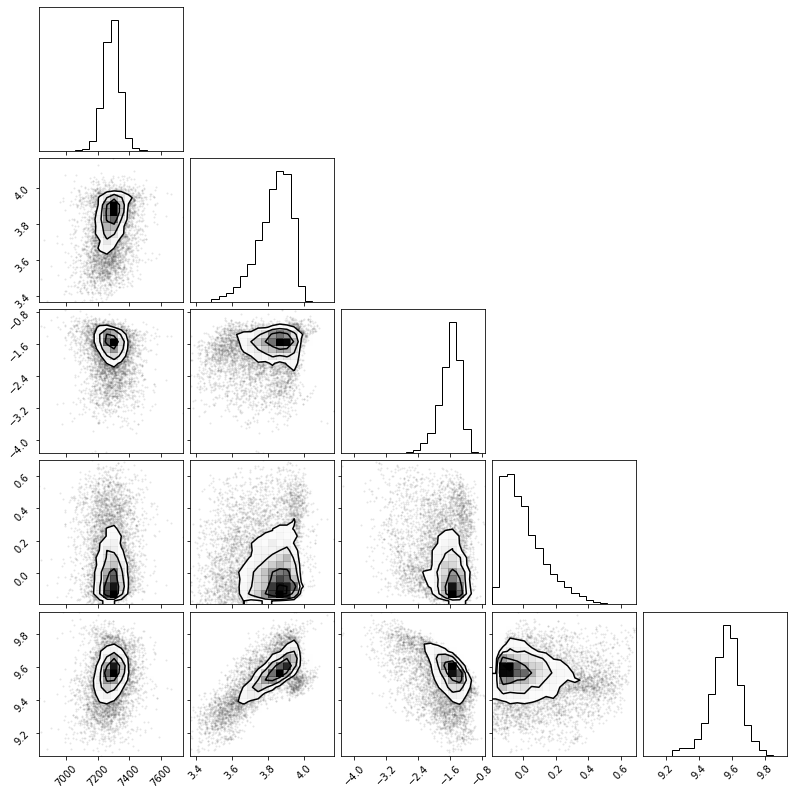

In [241]:
f = corner.corner(np.lib.recfunctions.structured_to_unstructured(np.array(tab[selcol])), weights = tab['Pr'], names = selcol)

In [242]:
acat['Field']

KeyError: 'Field'

In [243]:
acat

PROGRAMNAME,FIELDQUALITY,GAIA_G,FIRSTCARTON,RACAT,DECCAT,CATALOGID,FIELD,NEXP,EXPTIME,AIRMASS,HEALPIX,MJD_FINAL,SPEC_FILE,MJD,FIBER_RA,FIBER_DEC,SN_MEDIAN_ALL,SPECOBJID,MOON_DIST,MOON_PHASE,CARTON_TO_TARGET_PK,carton,H3_ID,PS_ID,TMASS_ID,WISE_ID,UNWISE_ID,GAIAEDR3_ID,GAIADR1_ID,TILE_ID,RA,DEC,RA_S,DEC_S,L,B,EBV,BHB,MGIANT,RAND,GUIDE,XFIT_RANK,PS_G,PS_R,PS_I,PS_Z,PS_Y,SDSS_U,SDSS_G,SDSS_R,SDSS_I,SDSS_Z,TMASS_J,TMASS_H,TMASS_K,WISE_W1,WISE_W2,UNWISE_W1,UNWISE_W2,GAIAEDR3_G,GAIAEDR3_BP,GAIAEDR3_RP,PS_G_ERR,PS_R_ERR,PS_I_ERR,PS_Z_ERR,PS_Y_ERR,SDSS_U_ERR,SDSS_G_ERR,SDSS_R_ERR,SDSS_I_ERR,SDSS_Z_ERR,TMASS_J_ERR,TMASS_H_ERR,TMASS_K_ERR,WISE_W1_ERR,WISE_W2_ERR,UNWISE_W1_ERR,UNWISE_W2_ERR,GAIAEDR3_G_ERR,GAIAEDR3_BP_ERR,GAIAEDR3_RP_ERR,GAIAEDR3_RA,GAIAEDR3_DEC,GAIAEDR3_RA_ERROR,GAIAEDR3_DEC_ERROR,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PARALLAX_OVER_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMDEC,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PSEUDOCOLOUR,GAIAEDR3_PSEUDOCOLOUR_ERROR,GAIAEDR3_NU_EFF_USED_IN_ASTROMETRY,GAIAEDR3_ASTROMETRIC_PARAMS_SOLVED,GAIAEDR3_PHOT_BP_RP_EXCESS_FACTOR,GAIAEDR3_VISIBILITY_PERIODS_USED,GAIAEDR3_RUWE,GAIAEDR3_IPD_GOF_HARMONIC_AMPLITUDE,GAIAEDR3_G_CORRECTED,GAIAEDR3_PARALLAX_CORRECTED,GAIAEDR3_PHOT_BP_RP_EXCESS_FACTOR_CORRECTED,GAIAEDR3_PARALLAX_PMRA_CORR,GAIAEDR3_PARALLAX_PMDEC_CORR,GAIAEDR3_PMRA_PMDEC_CORR,GAIAEDR3_RA_DEC_CORR,GAIAEDR3_RA_PARALLAX_CORR,GAIAEDR3_RA_PMRA_CORR,GAIAEDR3_RA_PMDEC_CORR,GAIAEDR3_DEC_PARALLAX_CORR,GAIAEDR3_DEC_PMRA_CORR,GAIAEDR3_DEC_PMDEC_CORR,WISE_CC_FLAGS,WISE_EXT_FLAG,UNWISE_FRACFLUX [2],UNWISE_FLAGS [2],UNWISE_INFO_FLAGS [2]
bytes13,bytes4,float32,bytes48,float64,float64,int64,int32,int16,int16,float32,int32,float64,bytes42,int32,float64,float64,float32,int64,float32,float32,int64,bytes48,int32,int32,bytes17,bytes19,bytes16,int64,int32,bytes8,float64,float64,bytes11,bytes12,float64,float64,float64,int16,int16,float64,int16,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes4,int32,float32,int16,int16
open_fiber,bad,16.778517,openfibertargets_nov2020_28c,289.656192484576,1.353059145374488,27021598780193757,100526,2,1800,1.2022252,95900,59740.420928012354,spec-100526-59740-27021598780193757.fits,59740,289.65618,1.3530392,26.637514,2501755803738596352,86.850006,0.78,582115952,openfibertargets_nov2020_28c,0,343118,-5995487372680608,0,2889p015o0020844,4264773302291367424,0,--,289.6561920290985,1.353058108203782,--,--,37.25049337510588,-5.424318965997192,0.5834862589836121,0,0,0.0,0,0.0,17.606733,16.667469,16.445084,16.130613,16.207764,99.0,99.0,99.0,99.0,99.0,15.313,14.879,14.894,0.0,0.0,14.719589,14.937925,16.782972,17.288391,16.08068,0.0067336713,0.007840145,0.0041791494,0.005884678,0.006424861,99.0,99.0,99.0,99.0,99.0,0.057,0.064,0.124,0.0,0.0,0.00968621,0.033673324,0.00840809,0.033256654,0.021841282,289.6561920290985,1.353058108203782,0.052065536,0.05129953,0.10847784842410181,0.06600257,1.6435398,-3.3166855612983634,-7.4719554142724665,0.06565359,0.06321045,--,--,1.4733317,31,1.2590151,17.0,0.98641694,0.30770612,16.782938,0.1372368484241018,0.021675539185523673,-0.1650221,-0.009425651,0.23975869,0.25458586,-0.004593028,0.013982099,-0.04328218,-0.27277145,0.004729799,0.06319329,0,0,0.6263639 .. 0.5851629,0 .. 0,0 .. 0
open_fiber,bad,17.403376,openfibertargets_nov2020_25,288.5624159315069,-1.9213952106871195,27021598708526805,100555,1,900,--,101530,59731.41554450247,spec-100555-59731-27021598708526805.fits,59731,288.56237,-1.9214876,14.975185,253440387

In [183]:
acat['GAIAEDR3_PARALLAX'] - acat['GAIAEDR3_PARALLAX_CORRECTED']

-0.028758999999999993
-0.03009700000000004
-0.02890499999999996
-0.035016
-0.028761000000000037
-0.033362
-0.03476999999999997
-0.042072
-0.02898500000000004
-0.04097200000000001
-0.03834399999999999


In [84]:
spall = Table.read('/n/holyscratch01/conroy_lab/vchandra/sdss5/catalogs/spAll-lite-v6_0_9.fits.gz')

In [85]:
spall['carton'] = [str(spall['FIRSTCARTON'][ii]).strip() for ii in range(len(spall))]

In [90]:
halocartons = ['mwm_halo_bb_boss', 
                    'mwm_halo_sm_boss',
                    'openfibertargets_nov2020_5',
                    'openfibertargets_nov2020_6a',
                    'openfibertargets_nov2020_6b',
                    'openfibertargets_nov2020_6c',
                    'openfibertargets_nov2020_25',
                    'openfibertargets_nov2020_28a',
                    'openfibertargets_nov2020_28b',
                    'openfibertargets_nov2020_28c',
                    'openfibertargets_nov2020_35a',
                    'openfibertargets_nov2020_35b',
                    'openfibertargets_nov2020_35c']

In [94]:
with open('/n/home03/vchandra/outerhalo/09_sdss5/pipeline/control/halocartons.txt', 'r') as file:
    halocartons = file.read().splitlines()

In [95]:
halocartons

['mwm_halo_bb_boss',
 'mwm_halo_sm_boss',
 'openfibertargets_nov2020_5',
 'openfibertargets_nov2020_6a',
 'openfibertargets_nov2020_6b',
 'openfibertargets_nov2020_6c',
 'openfibertargets_nov2020_25',
 'openfibertargets_nov2020_28a',
 'openfibertargets_nov2020_28b',
 'openfibertargets_nov2020_28c',
 'openfibertargets_nov2020_35a',
 'openfibertargets_nov2020_35b',
 'openfibertargets_nov2020_35c']

In [91]:
selected = np.repeat(False, len(spall))
for cart in halocartons:
    print('--')
    print(cart)
    print(np.sum((spall['carton'] == cart)))
    selected |= (spall['carton'] == cart)

--
mwm_halo_bb_boss
1851
--
mwm_halo_sm_boss
23
--
openfibertargets_nov2020_5
102
--
openfibertargets_nov2020_6a
182
--
openfibertargets_nov2020_6b
498
--
openfibertargets_nov2020_6c
1794
--
openfibertargets_nov2020_25
3210
--
openfibertargets_nov2020_28a
418
--
openfibertargets_nov2020_28b
447
--
openfibertargets_nov2020_28c
386
--
openfibertargets_nov2020_35a
1422
--
openfibertargets_nov2020_35b
37
--
openfibertargets_nov2020_35c
63


In [8]:
spall[spall['SPEC_FILE'] == 'spec-020549-59623-27021598075255912.fits']

PROGRAMNAME,FIELDQUALITY,GAIA_G,FIRSTCARTON,RACAT,DECCAT,CATALOGID,FIELD,NEXP,EXPTIME,AIRMASS,HEALPIX,MJD_FINAL,SPEC_FILE,MJD,FIBER_RA,FIBER_DEC,SN_MEDIAN_ALL,SPECOBJID,MOON_DIST,MOON_PHASE,CARTON_TO_TARGET_PK
bytes13,bytes4,float32,bytes40,float64,float64,int64,int32,int16,int16,float32,int32,float64,bytes41,int32,float64,float64,float32,int64,float32,float32,int64
mwm_filler,bad,14.4617,mwm_halo_bb_boss,69.8496672595,42.0588766114,27021598075255912,20549,4,3600,1.0472399,32102,59623.137831641085,spec-020549-59623-27021598075255912.fits,59623,69.849722,42.05877,55.243053,4689422751469928448,33.05,0.88,545512871


In [76]:
acat_clean = acat[has_spec]

In [77]:
nospec = acat[~has_spec]

In [81]:
nospec

PROGRAMNAME,FIELDQUALITY,GAIA_G,FIRSTCARTON,RACAT,DECCAT,CATALOGID,FIELD,NEXP,EXPTIME,AIRMASS,HEALPIX,MJD_FINAL,SPEC_FILE,MJD,FIBER_RA,FIBER_DEC,SN_MEDIAN_ALL,SPECOBJID,MOON_DIST,MOON_PHASE,CARTON_TO_TARGET_PK,H3_ID,PS_ID,TMASS_ID,WISE_ID,UNWISE_ID,GAIAEDR3_ID,GAIADR1_ID,TILE_ID,RA,DEC,RA_S,DEC_S,L,B,EBV,BHB,MGIANT,RAND,GUIDE,XFIT_RANK,PS_G,PS_R,PS_I,PS_Z,PS_Y,SDSS_U,SDSS_G,SDSS_R,SDSS_I,SDSS_Z,TMASS_J,TMASS_H,TMASS_K,WISE_W1,WISE_W2,UNWISE_W1,UNWISE_W2,GAIAEDR3_G,GAIAEDR3_BP,GAIAEDR3_RP,PS_G_ERR,PS_R_ERR,PS_I_ERR,PS_Z_ERR,PS_Y_ERR,SDSS_U_ERR,SDSS_G_ERR,SDSS_R_ERR,SDSS_I_ERR,SDSS_Z_ERR,TMASS_J_ERR,TMASS_H_ERR,TMASS_K_ERR,WISE_W1_ERR,WISE_W2_ERR,UNWISE_W1_ERR,UNWISE_W2_ERR,GAIAEDR3_G_ERR,GAIAEDR3_BP_ERR,GAIAEDR3_RP_ERR,GAIAEDR3_RA,GAIAEDR3_DEC,GAIAEDR3_RA_ERROR,GAIAEDR3_DEC_ERROR,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PARALLAX_OVER_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMDEC,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PSEUDOCOLOUR,GAIAEDR3_PSEUDOCOLOUR_ERROR,GAIAEDR3_NU_EFF_USED_IN_ASTROMETRY,GAIAEDR3_ASTROMETRIC_PARAMS_SOLVED,GAIAEDR3_PHOT_BP_RP_EXCESS_FACTOR,GAIAEDR3_VISIBILITY_PERIODS_USED,GAIAEDR3_RUWE,GAIAEDR3_IPD_GOF_HARMONIC_AMPLITUDE,GAIAEDR3_G_CORRECTED,GAIAEDR3_PARALLAX_CORRECTED,GAIAEDR3_PHOT_BP_RP_EXCESS_FACTOR_CORRECTED,GAIAEDR3_PARALLAX_PMRA_CORR,GAIAEDR3_PARALLAX_PMDEC_CORR,GAIAEDR3_PMRA_PMDEC_CORR,GAIAEDR3_RA_DEC_CORR,GAIAEDR3_RA_PARALLAX_CORR,GAIAEDR3_RA_PMRA_CORR,GAIAEDR3_RA_PMDEC_CORR,GAIAEDR3_DEC_PARALLAX_CORR,GAIAEDR3_DEC_PMRA_CORR,GAIAEDR3_DEC_PMDEC_CORR,WISE_CC_FLAGS,WISE_EXT_FLAG,UNWISE_FRACFLUX [2],UNWISE_FLAGS [2],UNWISE_INFO_FLAGS [2]
bytes13,bytes4,float32,bytes40,float64,float64,int64,int32,int16,int16,float32,int32,float64,bytes41,int32,float64,float64,float32,int64,float32,float32,int64,int32,int32,bytes17,bytes19,bytes16,int64,int32,bytes8,float64,float64,bytes11,bytes12,float64,float64,float64,int16,int16,float64,int16,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes4,int32,float32,int16,int16
open_fiber,good,15.774564,openfibertargets_nov2020_25,291.02580870193253,3.7097922982181397,27021598790468268,100512,1,900,--,91806,59794.246481886614,spec-100512-59794-27021598790468268.fits,59794,291.02579,3.7096817,24.60764,2486016845438517248,97.4,0.27,581057168,0,1037607,-6067333860486444,2904p030_ac51-05543,2904p030o0048835,4292498037730206336,0,--,291.025805294727,3.7097846271473434,--,--,39.9853663941549,-5.546411893933404,0.5139672160148621,0,0,0.0,0,0.0,16.701815,15.773455,15.341206,15.090264,14.936392,99.0,99.0,99.0,99.0,99.0,13.823,13.218,13.06,13.168,13.244,13.067043,13.125883,15.75976,16.466337,14.939029,0.004246834,0.0042656604,0.0059385984,0.004678533,0.00426922,99.0,99.0,99.0,99.0,99.0,0.026,0.035,0.029,0.029,0.035,0.0029729707,0.00795512,0.0004913184,0.0025407325,0.001694486,291.025805294727,3.7097846271473434,0.03205584,0.030385097,1.9549855678959975,0.040894013,47.806156,-24.581191758560777,-55.15899766107612,0.039293204,0.036279563,--,--,1.4168713,31,1.2746572,16.0,0.90885586,0.02874017,15.759727,1.9888775678959976,0.001187936418544977,-0.25910714,0.05571215,0.07037084,0.16712274,-0.20938376,0.031618085,-0.1837669,-0.1612922,-0.1290471,0.018492654,0000,0,0.9249017 .. 0.9093552,0 .. 0,0 .. 0
open_fiber,good,17.677841,openfibertargets_nov2020_25,290.6976140983535,3.9182558239277054,27021598790491446,100512,1,900,--,91805,59794.246481886614,spec-100512-59794-27021598790491446.fits,59794,290.69759,3.9181284,12.91418,2486017944950145024,97.1,0.27,581057

In [24]:
index = 2499

In [26]:
star = acat[index]

In [27]:
star['FIRSTCARTON']

'openfibertargets_nov2020_28c'

In [28]:
star

PROGRAMNAME,FIELDQUALITY,GAIA_G,FIRSTCARTON,RACAT,DECCAT,CATALOGID,FIELD,NEXP,EXPTIME,AIRMASS,HEALPIX,MJD_FINAL,SPEC_FILE,MJD,FIBER_RA,FIBER_DEC,SN_MEDIAN_ALL,SPECOBJID,MOON_DIST,MOON_PHASE,CARTON_TO_TARGET_PK,H3_ID,PS_ID,TMASS_ID,WISE_ID,UNWISE_ID,GAIAEDR3_ID,GAIADR1_ID,TILE_ID,RA,DEC,RA_S,DEC_S,L,B,EBV,BHB,MGIANT,RAND,GUIDE,XFIT_RANK,PS_G,PS_R,PS_I,PS_Z,PS_Y,SDSS_U,SDSS_G,SDSS_R,SDSS_I,SDSS_Z,TMASS_J,TMASS_H,TMASS_K,WISE_W1,WISE_W2,UNWISE_W1,UNWISE_W2,GAIAEDR3_G,GAIAEDR3_BP,GAIAEDR3_RP,PS_G_ERR,PS_R_ERR,PS_I_ERR,PS_Z_ERR,PS_Y_ERR,SDSS_U_ERR,SDSS_G_ERR,SDSS_R_ERR,SDSS_I_ERR,SDSS_Z_ERR,TMASS_J_ERR,TMASS_H_ERR,TMASS_K_ERR,WISE_W1_ERR,WISE_W2_ERR,UNWISE_W1_ERR,UNWISE_W2_ERR,GAIAEDR3_G_ERR,GAIAEDR3_BP_ERR,GAIAEDR3_RP_ERR,GAIAEDR3_RA,GAIAEDR3_DEC,GAIAEDR3_RA_ERROR,GAIAEDR3_DEC_ERROR,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PARALLAX_OVER_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMDEC,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PSEUDOCOLOUR,GAIAEDR3_PSEUDOCOLOUR_ERROR,GAIAEDR3_NU_EFF_USED_IN_ASTROMETRY,GAIAEDR3_ASTROMETRIC_PARAMS_SOLVED,GAIAEDR3_PHOT_BP_RP_EXCESS_FACTOR,GAIAEDR3_VISIBILITY_PERIODS_USED,GAIAEDR3_RUWE,GAIAEDR3_IPD_GOF_HARMONIC_AMPLITUDE,GAIAEDR3_G_CORRECTED,GAIAEDR3_PARALLAX_CORRECTED,GAIAEDR3_PHOT_BP_RP_EXCESS_FACTOR_CORRECTED,GAIAEDR3_PARALLAX_PMRA_CORR,GAIAEDR3_PARALLAX_PMDEC_CORR,GAIAEDR3_PMRA_PMDEC_CORR,GAIAEDR3_RA_DEC_CORR,GAIAEDR3_RA_PARALLAX_CORR,GAIAEDR3_RA_PMRA_CORR,GAIAEDR3_RA_PMDEC_CORR,GAIAEDR3_DEC_PARALLAX_CORR,GAIAEDR3_DEC_PMRA_CORR,GAIAEDR3_DEC_PMDEC_CORR,WISE_CC_FLAGS,WISE_EXT_FLAG,UNWISE_FRACFLUX [2],UNWISE_FLAGS [2],UNWISE_INFO_FLAGS [2]
bytes13,bytes4,float32,bytes40,float64,float64,int64,int32,int16,int16,float32,int32,float64,bytes41,int32,float64,float64,float32,int64,float32,float32,int64,int32,int32,bytes17,bytes19,bytes16,int64,int32,bytes8,float64,float64,bytes11,bytes12,float64,float64,float64,int16,int16,float64,int16,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes4,int32,float32,int16,int16
open_fiber,bad,15.290797,openfibertargets_nov2020_28c,278.07986368450673,79.31535405488889,27021597845717392,101729,1,900,--,1713,59707.18070648158,spec-101729-59707-27021597845717392.fits,59707,278.07973,79.315389,3.0642762,3856254347914510336,75.8,0.42,582097024,0,17214,-9125242823098982,2808p787_ac51-05964,2808p787o0035761,2294134898301488640,0,--,278.079862609321,79.31535442987833,--,--,110.90899971390782,27.505070336217283,0.08505121618509293,0,0,0.0,0,0.0,15.869937,15.454794,15.304141,15.31605,15.279339,-5.6841826,-6.967886,-7.2342296,-7.359135,-7.377315,14.473,14.233,14.141,13.987,13.974,13.993193,14.027784,15.323897,15.586275,14.880369,0.003476077,0.0028464787,0.002213419,0.0024223407,0.003400483,0.020986177,0.01988957,0.0150710195,0.023357788,0.018307177,0.03,0.044,0.075,0.025,0.028,0.004067975,0.010394275,0.01238721,0.04657284,0.02758595,278.079862609321,79.31535442987833,0.019958347,0.02041041,0.09098246667657223,0.020960841,4.3405924,-1.3023162744030803,2.7740736837393642,0.02463107,0.026415989,--,--,1.5882566,31,1.2027961,27.0,0.93932813,0.03790665,15.323864,0.10784146667657223,0.010220197304121603,-0.2808424,-0.08412384,0.044009034,0.036569677,0.09510918,-0.120519124,0.0650467,0.15551902,0.019094529,-0.29535,0000,0,0.94947976 .. 0.94588923,0 .. 0,0 .. 0


In [29]:
filepath = datadir + 'spectra/%s/%s/%s' % (redux, star['FIRSTCARTON'], star['SPEC_FILE'])

In [30]:
f = fits.open(filepath)

In [40]:
header = f[0].header

In [46]:
wave = [10.0**header['CRVAL1']]
for ii in range(len(f[1].data['FLUX'])):
    if ii == 0:
        continue
            
    wave.append(10.0**(header['CD1_1'] + np.log10(wave[ii-1])))
wave = np.array(wave)

In [51]:
f[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   32 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
NAXIS1  =                 4648 /                                                
EXTEND  =                    T /                                                
TELESCOP= 'SDSS 2.5-M'         / Sloan Digital Sky Survey                       
V_BOSS  = '6.0.1   '           / Active version of the BOSS ICC                 
CAMDAQ  = '1.5.0:37'                                                            
SUBFRAME= '' / the subframe readout command                                     
ERRCNT  = 'NONE    '                                                            
SYNCERR = 'NONE    '                                                            
SLINES  = 'NONE    '                                                            
PIXERR  = 'NONE    '        

In [18]:
acat

PROGRAMNAME,FIELDQUALITY,GAIA_G,FIRSTCARTON,RACAT,DECCAT,CATALOGID,FIELD,NEXP,EXPTIME,AIRMASS,HEALPIX,MJD_FINAL,SPEC_FILE,MJD,FIBER_RA,FIBER_DEC,SN_MEDIAN_ALL,SPECOBJID,MOON_DIST,MOON_PHASE,CARTON_TO_TARGET_PK,H3_ID,PS_ID,TMASS_ID,WISE_ID,UNWISE_ID,GAIAEDR3_ID,GAIADR1_ID,TILE_ID,RA,DEC,RA_S,DEC_S,L,B,EBV,BHB,MGIANT,RAND,GUIDE,XFIT_RANK,PS_G,PS_R,PS_I,PS_Z,PS_Y,SDSS_U,SDSS_G,SDSS_R,SDSS_I,SDSS_Z,TMASS_J,TMASS_H,TMASS_K,WISE_W1,WISE_W2,UNWISE_W1,UNWISE_W2,GAIAEDR3_G,GAIAEDR3_BP,GAIAEDR3_RP,PS_G_ERR,PS_R_ERR,PS_I_ERR,PS_Z_ERR,PS_Y_ERR,SDSS_U_ERR,SDSS_G_ERR,SDSS_R_ERR,SDSS_I_ERR,SDSS_Z_ERR,TMASS_J_ERR,TMASS_H_ERR,TMASS_K_ERR,WISE_W1_ERR,WISE_W2_ERR,UNWISE_W1_ERR,UNWISE_W2_ERR,GAIAEDR3_G_ERR,GAIAEDR3_BP_ERR,GAIAEDR3_RP_ERR,GAIAEDR3_RA,GAIAEDR3_DEC,GAIAEDR3_RA_ERROR,GAIAEDR3_DEC_ERROR,GAIAEDR3_PARALLAX,GAIAEDR3_PARALLAX_ERROR,GAIAEDR3_PARALLAX_OVER_ERROR,GAIAEDR3_PMRA,GAIAEDR3_PMDEC,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PSEUDOCOLOUR,GAIAEDR3_PSEUDOCOLOUR_ERROR,GAIAEDR3_NU_EFF_USED_IN_ASTROMETRY,GAIAEDR3_ASTROMETRIC_PARAMS_SOLVED,GAIAEDR3_PHOT_BP_RP_EXCESS_FACTOR,GAIAEDR3_VISIBILITY_PERIODS_USED,GAIAEDR3_RUWE,GAIAEDR3_IPD_GOF_HARMONIC_AMPLITUDE,GAIAEDR3_G_CORRECTED,GAIAEDR3_PARALLAX_CORRECTED,GAIAEDR3_PHOT_BP_RP_EXCESS_FACTOR_CORRECTED,GAIAEDR3_PARALLAX_PMRA_CORR,GAIAEDR3_PARALLAX_PMDEC_CORR,GAIAEDR3_PMRA_PMDEC_CORR,GAIAEDR3_RA_DEC_CORR,GAIAEDR3_RA_PARALLAX_CORR,GAIAEDR3_RA_PMRA_CORR,GAIAEDR3_RA_PMDEC_CORR,GAIAEDR3_DEC_PARALLAX_CORR,GAIAEDR3_DEC_PMRA_CORR,GAIAEDR3_DEC_PMDEC_CORR,WISE_CC_FLAGS,WISE_EXT_FLAG,UNWISE_FRACFLUX [2],UNWISE_FLAGS [2],UNWISE_INFO_FLAGS [2]
bytes13,bytes4,float32,bytes40,float64,float64,int64,int32,int16,int16,float32,int32,float64,bytes41,int32,float64,float64,float32,int64,float32,float32,int64,int32,int32,bytes17,bytes19,bytes16,int64,int32,bytes8,float64,float64,bytes11,bytes12,float64,float64,float64,int16,int16,float64,int16,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes4,int32,float32,int16,int16
open_fiber,good,15.774564,openfibertargets_nov2020_25,291.02580870193253,3.7097922982181397,27021598790468268,100512,1,900,--,91806,59794.246481886614,spec-100512-59794-27021598790468268.fits,59794,291.02579,3.7096817,24.60764,2486016845438517248,97.4,0.27,581057168,0,1037607,-6067333860486444,2904p030_ac51-05543,2904p030o0048835,4292498037730206336,0,--,291.025805294727,3.7097846271473434,--,--,39.9853663941549,-5.546411893933404,0.5139672160148621,0,0,0.0,0,0.0,16.701815,15.773455,15.341206,15.090264,14.936392,99.0,99.0,99.0,99.0,99.0,13.823,13.218,13.06,13.168,13.244,13.067043,13.125883,15.75976,16.466337,14.939029,0.004246834,0.0042656604,0.0059385984,0.004678533,0.00426922,99.0,99.0,99.0,99.0,99.0,0.026,0.035,0.029,0.029,0.035,0.0029729707,0.00795512,0.0004913184,0.0025407325,0.001694486,291.025805294727,3.7097846271473434,0.03205584,0.030385097,1.9549855678959975,0.040894013,47.806156,-24.581191758560777,-55.15899766107612,0.039293204,0.036279563,--,--,1.4168713,31,1.2746572,16.0,0.90885586,0.02874017,15.759727,1.9888775678959976,0.001187936418544977,-0.25910714,0.05571215,0.07037084,0.16712274,-0.20938376,0.031618085,-0.1837669,-0.1612922,-0.1290471,0.018492654,0000,0,0.9249017 .. 0.9093552,0 .. 0,0 .. 0
open_fiber,good,17.677841,openfibertargets_nov2020_25,290.6976140983535,3.9182558239277054,27021598790491446,100512,1,900,--,91805,59794.246481886614,spec-100512-59794-27021598790491446.fits,59794,290.69759,3.9181284,12.91418,2486017944950145024,97.1,0.27,581057

In [ ]:
spall = Table.read('/n/holyscratch01/conroy_lab/vchandra/sdss5/catalogs/spAll_halo.fits')

In [ ]:
len(spall)

In [23]:
spall[spall['SPEC_FILE'] == 'spec-100512-59794-27021598790468268.fits']

PROGRAMNAME,FIELDQUALITY,GAIA_G,FIRSTCARTON,RACAT,DECCAT,CATALOGID,FIELD,NEXP,EXPTIME,AIRMASS,HEALPIX,MJD_FINAL,SPEC_FILE,MJD,FIBER_RA,FIBER_DEC,SN_MEDIAN_ALL,SPECOBJID,MOON_DIST,MOON_PHASE,CARTON_TO_TARGET_PK
bytes13,bytes4,float32,bytes40,float64,float64,int64,int32,int16,int16,float32,int32,float64,bytes41,int32,float64,float64,float32,int64,float32,float32,int64
open_fiber,good,15.774564,openfibertargets_nov2020_25,291.02580870193253,3.7097922982181397,27021598790468268,100512,1,900,--,91806,59794.246481886614,spec-100512-59794-27021598790468268.fits,59794,291.02579,3.7096817,24.60764,2486016845438517248,97.4,0.27,581057168


In [ ]:
def photon_flux(wavelength, flux):
  # The speed of light in a vacuum, in m/s
  c = 299792458
  # The Planck constant, in J s
  h = 6.62607015e-34
  # The frequency of the light, in Hz
  f = c / (wavelength * 1e-10)
  # The energy of a single photon, in J
  E = h * f
  # The number of photons received per second
  N = flux * 1e-7 / E
  return N